In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
dataframe = pd.read_csv(r"indicadores_s_tres_CLASE.csv")
dataframe

,SUB,VERB,OBJ,CLASS
0,0.781959,0.156635,0.187401,entailment
1,0.578660,0.101199,0.342251,contradiction
2,0.021716,0.352879,0.164790,contradiction
3,0.477035,0.113215,0.329154,neutral
4,0.300340,0.093181,0.162944,neutral
...,...,...,...,...
89,0.563682,0.747842,1.000000,entailment
90,0.380955,0.393837,0.525837,entailment
91,0.090585,0.250336,0.271201,contradiction
92,0.643972,0.577761,0.214616,contradiction


In [7]:
dataframe.describe()

,SUB,VERB,OBJ
count,94.000000,94.000000,94.000000
mean,0.447525,0.338987,0.477248
std,0.234408,0.235782,0.339018
min,0.021716,0.009247,0.031655
25%,0.271594,0.175253,0.215494
50%,0.440133,0.263579,0.331611
75%,0.569646,0.434652,1.000000
max,1.000000,1.000000,1.000000


In [8]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       41
neutral          26
dtype: int64


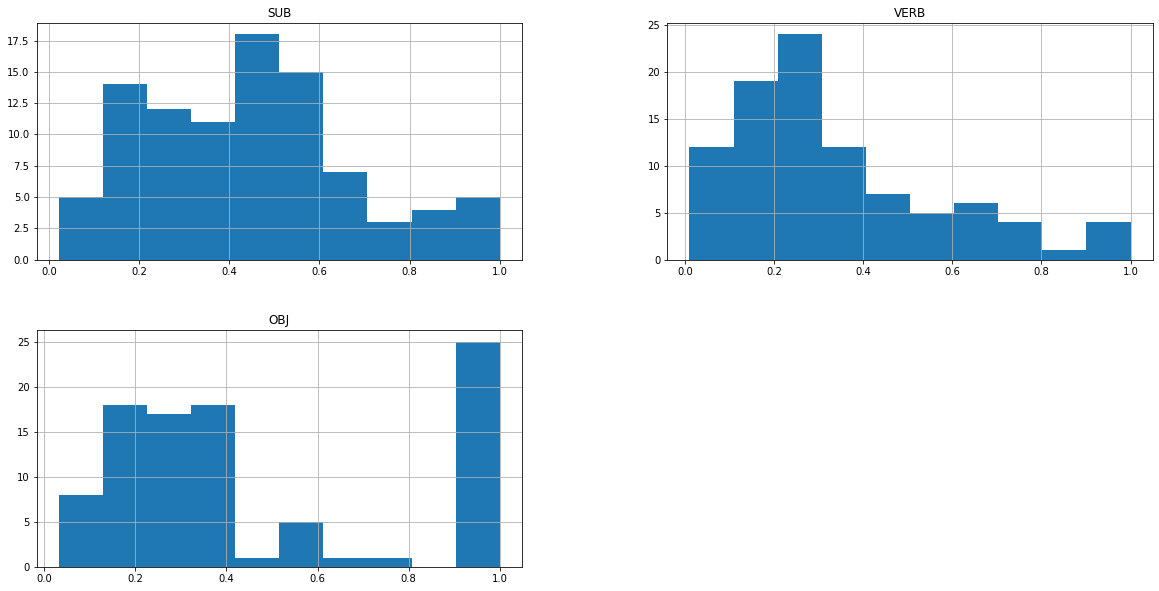

In [9]:
dataframe.hist(figsize=(20,10))
plt.show()

/home/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


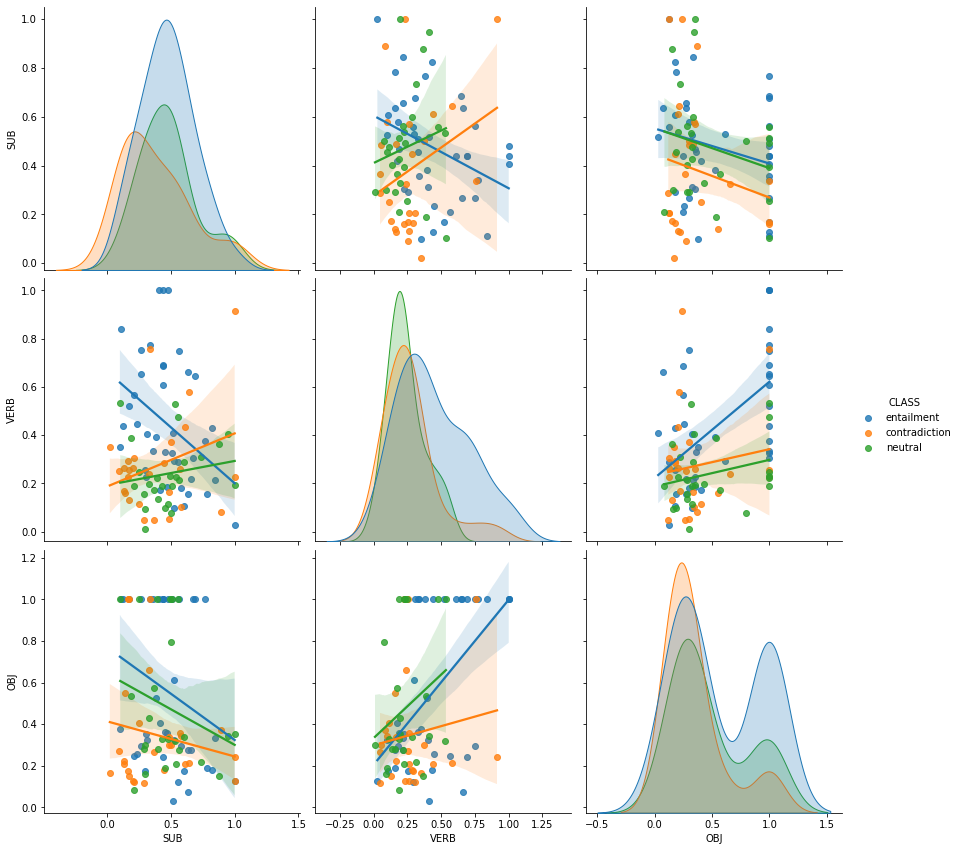

In [11]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=["SUB", "VERB","OBJ"],kind='reg')

In [12]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_67385/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_67385/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(94, 3)

In [13]:
y_test

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [14]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [15]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [16]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
model.decision_function(X)

array([[-0.08496995,  0.19639951, -0.11142956],
       [-0.08492755,  0.19153732, -0.10660977],
       [ 0.01368213,  0.18865295, -0.20233508],
       [-0.06737992,  0.18342267, -0.11604275],
       [ 0.00433629,  0.12437613, -0.12871242],
       [-0.11071135,  0.29695744, -0.1862461 ],
       [-0.33640991,  0.53020406, -0.19379415],
       [-0.23635778,  0.35744764, -0.12108986],
       [-0.04830967,  0.15988036, -0.11157069],
       [-0.07590328,  0.21521454, -0.13931126],
       [-0.33878581,  0.62739026, -0.28860445],
       [-0.00374582,  0.18391057, -0.18016475],
       [-0.04678175,  0.17426471, -0.12748297],
       [-0.1048379 ,  0.2513946 , -0.1465567 ],
       [-0.27275458,  0.54533406, -0.27257948],
       [-0.11348435,  0.22887081, -0.11538646],
       [-0.14315418,  0.28410064, -0.14094646],
       [-0.07799639,  0.267827  , -0.18983061],
       [-0.26816479,  0.40457303, -0.13640824],
       [-0.08459915,  0.21471194, -0.13011279],
       [-0.11756799,  0.26878563, -0.151

In [18]:
labels=np.array(['SUB', 'VERB',  'OBJ'])

In [19]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [20]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [21]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  1 VERB 2 OBJ
Entailment  1 VERB 0 SUB
Neutral  0 SUB 1 VERB


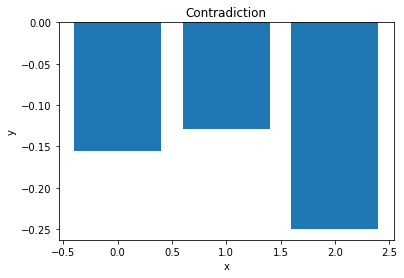

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,3,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

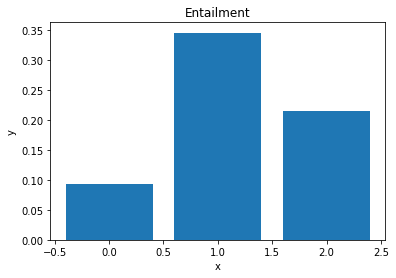

In [24]:
x_v = np.arange(0,3,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

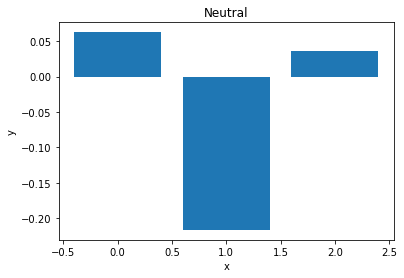

In [25]:
x_v = np.arange(0,3,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [26]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailme

In [27]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [28]:
X

array([[0.78195906, 0.15663458, 0.18740141],
       [0.57866007, 0.10119945, 0.34225065],
       [0.02171589, 0.35287854, 0.16478956],
       [0.47703475, 0.11321482, 0.32915369],
       [0.30033988, 0.09318054, 0.16294372],
       [0.19067603, 0.3890622 , 0.53784853],
       [0.68591589, 0.64341176, 1.00000012],
       [0.39240867, 0.22288509, 1.00000012],
       [0.60609794, 0.10475443, 0.17711544],
       [0.13944672, 0.15942846, 0.54923189],
       [0.40510619, 1.00000012, 1.00000012],
       [0.1670482 , 0.29410529, 0.1743716 ],
       [0.40185267, 0.13645515, 0.28163803],
       [0.73302579, 0.30975479, 0.21812665],
       [0.11260018, 0.84146142, 1.00000012],
       [1.        , 0.22823887, 0.12874772],
       [0.32593334, 0.23928717, 0.6606375 ],
       [0.31225553, 0.40529734, 0.32322192],
       [0.50981408, 0.32754868, 1.        ],
       [0.41763145, 0.17334291, 0.40381595],
       [0.87709343, 0.36205804, 0.152392  ],
       [0.57163441, 0.2590012 , 0.35623097],
       [0.

In [29]:
model.score(X,y)

0.43617021276595747

In [30]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [31]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.444444 (0.193150)


In [32]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [33]:
print(confusion_matrix(Y_validation, predictions))

[[0 1 0]
 [0 6 0]
 [0 3 0]]


In [34]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         1
   entailment       0.60      1.00      0.75         6
      neutral       0.00      0.00      0.00         3

     accuracy                           0.60        10
    macro avg       0.20      0.33      0.25        10
 weighted avg       0.36      0.60      0.45        10



/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#X_new = pd.DataFrame()
#model.predict(X_new)

# Valores ShapLey

In [30]:
import sklearn
import shap
shap.initjs()

In [31]:
li=dataframe.columns
li=li.to_list()

In [32]:
explainer = shap.Explainer(
    model, X_train
)
shap_values = explainer(X_test)

In [33]:
shap_values

.values =
array([[[ 2.03647829e-02, -1.61493865e-02, -4.21539643e-03],
        [ 3.31204541e-02, -1.86630613e-02, -1.44573928e-02],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[-7.07623013e-02,  5.61148997e-02,  1.46474016e-02],
        [-1.03289507e-02,  5.82026559e-03,  4.50868507e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[ 1.03838992e-01, -8.23449002e-02, -2.14940920e-02],
        [-3.25696703e-03,  1.83526999e-03,  1.42169705e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.078

In [34]:
shap_values.shape

(94, 22, 3)

In [35]:
X_train.shape

(84, 22)

In [36]:
X_test.shape

(94, 22)

In [37]:
shap_values

.values =
array([[[ 2.03647829e-02, -1.61493865e-02, -4.21539643e-03],
        [ 3.31204541e-02, -1.86630613e-02, -1.44573928e-02],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[-7.07623013e-02,  5.61148997e-02,  1.46474016e-02],
        [-1.03289507e-02,  5.82026559e-03,  4.50868507e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [-6.30715998e-22,  1.07889768e-21, -4.48181687e-22],
        [ 3.88921142e-02,  2.37541324e-02, -6.26462467e-02]],

       [[ 1.03838992e-01, -8.23449002e-02, -2.14940920e-02],
        [-3.25696703e-03,  1.83526999e-03,  1.42169705e-03],
        [ 2.46379002e-02, -4.94894123e-02,  2.48515121e-02],
        ...,
        [-6.30715998e-22,  1.078

TypeError: only integer scalar arrays can be converted to a scalar index

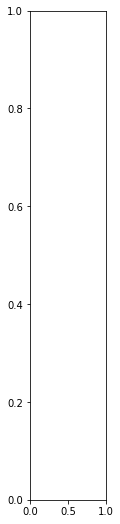

In [38]:
shap.summary_plot(shap_values,X_train,max_display=10)

In [ ]:
shap.plots.waterfall(shap_values.values)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.